In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
np.set_printoptions(suppress=True)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
dataset_1=pd.read_csv("../input/jmir-derivatives/msd-jmirderivatives_dev.csv")
dataset_2=pd.read_csv("../input/marsyas/msd-marsyas_dev_new.csv")
dataset_3=pd.read_csv("../input/rhythm-histogram/msd-rh_dev_new.csv")
#print(os.listdir("../input/msd-jmirderivatives_dev.csv"))

# Any results you write to the current directory are saved as output.

In [4]:
dataset_3.head()

,1,TRAAAAK128F9318786,12.853071,10.332411,10.335533,7.868886,7.272001,6.099896,5.53476,4.643962,...,2.275085,2.112406,2.758121,2.090873,1.908192,2.123749,1.88613,2.012004,2.043548,METAL_ALTERNATIVE
0,2,TRAAAAV128F421A322,17.198986,9.442742,4.757221,4.228200,4.539081,4.497560,4.277170,3.594716,...,1.812926,1.528240,1.857964,1.707600,1.458026,1.373432,1.602645,1.737878,1.609511,PUNK
1,4,TRAAACV128F423E09E,19.389994,17.027159,13.058027,11.155796,9.669224,8.961533,7.499838,6.920094,...,2.506652,2.350971,2.535761,2.718591,2.276181,2.453018,2.511504,2.826884,3.663387,ROCK_NEO_PSYCHEDELIA
2,5,TRAAAEF128F4273421,11.605080,9.256760,8.724176,8.200969,5.643767,8.921944,5.330176,5.428105,...,1.983979,1.886013,1.614015,1.974214,1.576792,1.651524,1.962007,3.463660,1.802102,POP_INDIE
3,6,TRAAAFP128F931B4E3,14.023560,11.152698,9.383973,7.436968,8.166128,7.703664,8.503490,7.916817,...,2.760915,3.371663,3.361057,3.515818,11.103334,5.209470,3.003968,3.046713,3.444955,HIP_HOP_RAP
4,7,TRAAAGR128F425B14B,16.251157,12.928630,11.824451,9.004019,7.283724,9.803689,5.986288,6.647643,...,2.516831,1.955422,2.285945,2.469236,2.305712,1.876578,2.024935,1.924972,2.377372,POP_CONTEMPORARY


In [5]:
dataset_1=dataset_1.iloc[:,2:]
dataset_2=dataset_2.iloc[:,2:]
dataset_3=dataset_3.iloc[:,2:]

In [6]:
dataset_2.head()

,0.132028,0.091345,0.233464,0.086542,-38.999132,2.723627,-0.133527,0.591571,-0.230206,0.419776,...,0.001431,0.001528,0.001541,0.001468,0.001439,0.001304,0.001107,0.17907,1.255948,METAL_ALTERNATIVE
0,0.127183,0.090223,0.242338,0.089374,-41.151760,2.798033,-0.726277,1.631193,-0.228796,0.367150,...,0.000379,0.000384,0.000383,0.000370,0.000342,0.000352,0.000396,0.145435,0.668222,PUNK
1,0.059328,0.040161,0.093398,0.104772,-43.009619,4.192990,-0.521473,1.670314,0.052299,-0.150498,...,0.000259,0.000271,0.000282,0.000282,0.000269,0.000254,0.000254,0.111322,0.435191,ROCK_NEO_PSYCHEDELIA
2,0.082033,0.061840,0.137211,0.100236,-43.331360,3.491156,-0.364496,1.199155,-0.476379,0.130939,...,0.000218,0.000214,0.000221,0.000223,0.000213,0.000204,0.000201,0.246681,2.129936,POP_INDIE
3,0.080589,0.054988,0.399908,0.098947,-42.418817,2.374161,-0.259375,0.153841,-0.101845,-0.163809,...,0.003283,0.003255,0.003185,0.003140,0.003253,0.003282,0.003257,0.218629,1.568039,HIP_HOP_RAP
4,0.076593,0.048001,0.244860,0.095075,-41.616322,2.692762,-0.217356,0.904691,-0.090575,0.451840,...,0.002038,0.002048,0.002011,0.001999,0.002039,0.002013,0.001974,0.192679,0.967168,POP_CONTEMPORARY


In [7]:

print(dataset_3.shape)

(179554, 61)


In [8]:
Xdataset_1=dataset_1.iloc[:,0:96]
Ydataset_1=dataset_1.iloc[:,96]
Xdataset_2=dataset_2.iloc[:,0:124]
Ydataset_2=dataset_2.iloc[:,124]
Xdataset_3=dataset_3.iloc[:,0:60]
Ydataset_3=dataset_3.iloc[:,60]

In [9]:
Ydataset_1.head()

0                    PUNK
1    ROCK_NEO_PSYCHEDELIA
2               POP_INDIE
3             HIP_HOP_RAP
4        POP_CONTEMPORARY
Name: METAL_ALTERNATIVE, dtype: object

Split the data into 70% training and 30% test

In [10]:
from sklearn.model_selection import train_test_split

Xtrain_1, Xtest_1, Ytrain_1, Ytest_1 = train_test_split(
    Xdataset_1, Ydataset_1, test_size=0.3, random_state=0, shuffle=True, stratify=Ydataset_1
)
Xtrain_2, Xtest_2, Ytrain_2, Ytest_2 = train_test_split(
    Xdataset_2, Ydataset_2, test_size=0.3, random_state=0, shuffle=True, stratify=Ydataset_2
)
Xtrain_3, Xtest_3, Ytrain_3, Ytest_3 = train_test_split(
    Xdataset_3, Ydataset_3, test_size=0.3, random_state=0, shuffle=True, stratify=Ydataset_3
)

In [70]:
np.set_printoptions(precision=4)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
Xtrain_1 = scaler.fit_transform(Xtrain_1)
Xtest_1 = scaler.transform(Xtest_1)
Xtrain_2 = scaler.fit_transform(Xtrain_2)
Xtest_2=  scaler.transform(Xtest_2)
Xtrain_3 = scaler.fit_transform(Xtrain_3)
Xtest_3 = scaler.transform(Xtest_3)

In [34]:
Xtest_2

array([[1.15820882e-01, 1.14812601e-01, 9.24935375e-02, ...,
        5.05293551e-03, 2.03797283e-01, 7.86407193e-08],
       [9.08066716e-02, 5.27318606e-02, 2.08421890e-01, ...,
        8.45765159e-02, 1.44017312e-01, 2.20846931e-08],
       [1.82985762e-01, 1.31199730e-01, 1.67313086e-01, ...,
        4.80028874e-02, 1.87919342e-01, 2.05399836e-08],
       ...,
       [1.66392126e-01, 1.42763879e-01, 3.84225202e-01, ...,
        1.51948989e-01, 6.20232874e-01, 6.94160072e-07],
       [8.37858276e-02, 7.37255779e-02, 5.73886020e-02, ...,
        1.28729548e-02, 2.01924621e-01, 3.76086902e-08],
       [2.20578772e-01, 1.68098279e-01, 2.07928686e-01, ...,
        1.10683349e-01, 2.12736631e-01, 5.62301735e-08]])

In [13]:
Xtrain_1

array([[0.13518086, 0.12447694, 0.04283713, ..., 0.12905682, 0.48250576,
        0.48384586],
       [0.12160638, 0.15835771, 0.02823129, ..., 0.23755126, 0.47307751,
        0.4743237 ],
       [0.19836639, 0.22299213, 0.05636255, ..., 0.28160516, 0.46346508,
        0.46465511],
       ...,
       [0.14669389, 0.16575928, 0.05416166, ..., 0.20527241, 0.48357636,
        0.48486705],
       [0.07658499, 0.09509561, 0.03205282, ..., 0.11575864, 0.46930161,
        0.47052447],
       [0.35783742, 0.28256468, 0.1334934 , ..., 0.35008787, 0.47098619,
        0.47220501]])

First model is decision tree

In [29]:
from sklearn import tree
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, accuracy_score, classification_report, precision_recall_fscore_support
metrics = ['precision', 'recall']
tree_para = {'criterion':['gini','entropy'],'max_depth':[6,7,8,9,10]}

In [15]:
model_DT = tree.DecisionTreeClassifier()
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=None)


In [14]:
#for metric in metrics:
#    print("# Tuning hyper-parameters for %s" % metric)
#    print()

#    tuned_model = GridSearchCV(model_DT, tree_para, cv=cv, scoring='%s_macro' % metric)
#    tuned_model.fit(Xtrain_1, Ytrain_1)

#    print("Best parameters set found on development set:")
#    print()
#    print(tuned_model.best_params_)
#    print()

# Tuning hyper-parameters for precision



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1142: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1142: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1142: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1142: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classificatio

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1142: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1142: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1142: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1142: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classificatio

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1142: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1142: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 10}

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'criterion': 'entropy', 'max_depth': 10}



The second model Multinomial NB

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Ytrain_2 = le.fit_transform(Ytrain_2)
Ytest_2 = le.fit_transform(Ytest_2)
Ytest_2

array([ 5,  4,  9, ...,  3, 19, 16])

In [18]:
n_folds = 20

skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=0)

sum_precision = 0
sum_f1_score = 0
fold_counter = 0

print("Naive Bayes Multinomial with " + str(n_folds) + " folds\n")

# Loop through the 10 folds
for train_index, test_index in skf.split(Xtrain_2, Ytrain_2):
    X_train, X_valid = Xtrain_2[train_index], Xtrain_2[test_index];
    Y_train, Y_valid = Ytrain_2[train_index], Ytrain_2[test_index];
    
    model_NB = MultinomialNB()
    model_NB = model_NB.fit(X_train, Y_train)
    
    Y_valid_pred = model_NB.predict(X_valid)
        
    precision,_,f1_score,_ = precision_recall_fscore_support(Y_valid, Y_valid_pred, average="weighted")
    
    sum_precision += precision;
    sum_f1_score += f1_score;
    fold_counter += 1
    print("Correct classification rate for fold #" + str(fold_counter) + ": " + str(round(precision * 100, 4)) + "%")

print("Correct classification rate: " + str(round((sum_precision / n_folds) * 100, 4)) + "%")
print("F1 Score: " + str(round((sum_precision / n_folds), 4)))


Naive Bayes Multinomial with 20 folds



NameError: name 'precision_recall_fscore_support' is not defined

Third Model KNN

In [19]:
from sklearn import neighbors

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=None)
metrics = ['precision', 'recall']
knn_para = {'n_neighbors':[3, 5, 10]}
model_KNN = neighbors.KNeighborsClassifier(weights='uniform', algorithm='kd_tree', 
                                           metric='euclidean')

#for metric in metrics:
#    print("# Tuning hyper-parameters for %s" % metric)
#    print()

#    tuned_model = GridSearchCV(model_KNN, knn_para, cv=cv, scoring='%s_macro' % metric, n_jobs=12)
#    tuned_model.fit(Xtrain_3, Ytrain_3)

#    print("Best parameters set found on development set:")
#    print()
#    print(tuned_model.best_params_)
#    print()   


In [20]:
from sklearn.metrics import classification_report

print(classification_report(Ytest_1, Ytest_pred_1))
print(classification_report(Ytest_2, Ytest_pred_2))
print(classification_report(Ytest_3, Ytest_pred_3))

NameError: name 'Ytest_pred_1' is not defined

In [21]:
from sklearn.ensemble import VotingClassifier

# Building the Ensemble 
# Combination with MAJORITY VOTE (labels only)

def ENSEMBLE_model_3():
    print("Majority Vote of Decision Tree, Naive Bayes and KNN\n")
    model = VotingClassifier(estimators = [ ('DT', model_DT_optimal), ('NB', model_NB) , ('SVM', model_KNN_optimal) ], 
                             voting = 'hard',
                             n_jobs = 3) 
    return model

def ENSEMBLE_model_3s():
    
    model = VotingClassifier(estimators = [ ('DT', model_DT_optimal), ('NB', model_NB) , ('SVM', model_KNN_optimal) ], 
                             voting = 'soft',
                             n_jobs = 3,
                             weights=[0.05,0.15,0.8]) 
    return model

In [22]:
model_DT_DS1 = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, max_depth=10)
model_DT_DS2 = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, max_depth=10)
model_DT_DS3 = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, max_depth=10)

model_NB_DS1 = GaussianNB()
model_NB_DS2 = GaussianNB()
model_NB_DS3 = GaussianNB()

model_KNN_DS1 = neighbors.KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='kd_tree', metric='euclidean')
model_KNN_DS2 = neighbors.KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='kd_tree', metric='euclidean')
model_KNN_DS3 = neighbors.KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='kd_tree', metric='euclidean')

model_ENSEMBLE_DS1 = VotingClassifier(estimators = [ ('DT', model_DT_DS1), ('NB', model_NB_DS1) , ('KNN', model_KNN_DS1) ], voting = 'hard', n_jobs = 3) 
model_ENSEMBLE_DS2 = VotingClassifier(estimators = [ ('DT', model_DT_DS1), ('NB', model_NB_DS2) , ('KNN', model_KNN_DS2) ], voting = 'hard', n_jobs = 3)
model_ENSEMBLE_DS3 = VotingClassifier(estimators = [ ('DT', model_DT_DS1), ('NB', model_NB_DS3) , ('KNN', model_KNN_DS3) ], voting = 'hard', n_jobs = 3)

In [23]:
model_DT_DS1.fit(Xtrain_1, Ytrain_1)
model_DT_DS2.fit(Xtrain_2, Ytrain_2)
model_DT_DS3.fit(Xtrain_3, Ytrain_3)

model_NB_DS1.fit(Xtrain_1, Ytrain_1)
model_NB_DS2.fit(Xtrain_2, Ytrain_2)
model_NB_DS3.fit(Xtrain_3, Ytrain_3)

model_KNN_DS1.fit(Xtrain_1, Ytrain_1)
model_KNN_DS2.fit(Xtrain_2, Ytrain_2)
model_KNN_DS3.fit(Xtrain_3, Ytrain_3)

#model_BAG_DS1.fit(Xtrain_1, Ytrain_1)
#model_BAG_DS2.fit(Xtrain_2, Ytrain_2)
#model_BAG_DS3.fit(Xtrain_3, Ytrain_3)

model_ENSEMBLE_DS1.fit(Xtrain_1, Ytrain_1)
model_ENSEMBLE_DS2.fit(Xtrain_2, Ytrain_2)
model_ENSEMBLE_DS3.fit(Xtrain_3, Ytrain_3)

VotingClassifier(estimators=[('DT', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_le...dean',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=3, voting='hard', weights=None)

In [24]:
Ytest_pred_DT_DS1 = model_DT_DS1.predict(Xtest_1)
Ytest_pred_DT_DS2 = model_DT_DS2.predict(Xtest_2)
Ytest_pred_DT_DS3 = model_DT_DS3.predict(Xtest_3)

Ytest_pred_NB_DS1 = model_NB_DS1.predict(Xtest_1)
Ytest_pred_NB_DS2 = model_NB_DS2.predict(Xtest_2)
Ytest_pred_NB_DS3 = model_NB_DS3.predict(Xtest_3)

Ytest_pred_KNN_DS1 = model_KNN_DS1.predict(Xtest_1)
Ytest_pred_KNN_DS2 = model_KNN_DS2.predict(Xtest_2)
Ytest_pred_KNN_DS3 = model_KNN_DS3.predict(Xtest_3)

#Ytest_pred_BAG_DS1 = model_BAG_DS1.predict(Xtest_1)
#Ytest_pred_BAG_DS2 = model_BAG_DS2.predict(Xtest_2)
#Ytest_pred_BAG_DS3 = model_BAG_DS3.predict(Xtest_3)

Ytest_pred_ENSEMBLE_DS1  = model_ENSEMBLE_DS1.predict(Xtest_1)
Ytest_pred_ENSEMBLE_DS2  = model_ENSEMBLE_DS2.predict(Xtest_2)
Ytest_pred_ENSEMBLE_DS3  = model_ENSEMBLE_DS3.predict(Xtest_3)

/home/alexandre/miniconda3/envs/gti770/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/alexandre/miniconda3/envs/gti770/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/alexandre/miniconda3/envs/gti770/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [83]:
# Evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Final evaluation of the model (On the Test dataset)

# Decision Tree
scores_tst_DT_DS1 = accuracy_score(Ytest_1,  Ytest_pred_DT_DS1)
print("Classification rate for the test dataset (Decision Tree, jmir-derivatives) = "+str(scores_tst_DT_DS1*100)+"%")
scores_tst_DT_DS2 = accuracy_score(Ytest_2,  Ytest_pred_DT_DS2)
print("Classification rate for the test dataset (Decision Tree, marsyas) = "+str(scores_tst_DT_DS2*100)+"%")
scores_tst_DT_DS3 = accuracy_score(Ytest_3,  Ytest_pred_DT_DS3)
print("Classification rate for the test dataset (Decision Tree, rhythm-histogram) = "+str(scores_tst_DT_DS3*100)+"%\n")

# Naive Bayes Gaussian
scores_tst_NB_DS1 = accuracy_score(Ytest_1,  Ytest_pred_NB_DS1)
print("Classification rate for the test dataset (Naive Bayes, jmir-derivatives) = "+str(scores_tst_NB_DS1*100)+"%")
scores_tst_NB_DS2 = accuracy_score(Ytest_2,  Ytest_pred_NB_DS2)
print("Classification rate for the test dataset (Naive Bayes, marsyas) = "+str(scores_tst_NB_DS2*100)+"%")
scores_tst_NB_DS3 = accuracy_score(Ytest_3,  Ytest_pred_NB_DS3)
print("Classification rate for the test dataset (Naive Bayes, rhythm-histogram) = "+str(scores_tst_NB_DS3*100)+"%\n")

# K-NN
scores_tst_KNN_DS1 = accuracy_score(Ytest_1,  Ytest_pred_KNN_DS1)
print("Classification rate for the test dataset (k-NN, jmir-derivatives) = "+str(scores_tst_KNN_DS1*100)+"%")
scores_tst_KNN_DS2 = accuracy_score(Ytest_2,  Ytest_pred_KNN_DS2)
print("Classification rate for the test dataset (k-NN, marsyas) = "+str(scores_tst_KNN_DS2*100)+"%")
scores_tst_KNN_DS3 = accuracy_score(Ytest_3,  Ytest_pred_KNN_DS3)
print("Classification rate for the test dataset (k-NN, rhythm-histogram) = "+str(scores_tst_KNN_DS3*100)+"%\n")

# Bagging
#scores_tst_BAG_DS1 = accuracy_score(Ytest_1,  Ytest_pred_BAG_DS1)
#print("Classification rate for the test dataset (Bagging, jmir-derivatives) = "+str(scores_tst_BAG_DS1*100)+"%")
#scores_tst_BAG_DS2 = accuracy_score(Ytest_2,  Ytest_pred_BAG_DS2)
#print("Classification rate for the test dataset (Bagging, marsyas) = "+str(scores_tst_BAG_DS2*100)+"%")
#scores_tst_BAG_DS3 = accuracy_score(Ytest_3,  Ytest_pred_BAG_DS3)
#print("Classification rate for the test dataset (Bagging, rhythm-histogram) = "+str(scores_tst_BAG_DS3*100)+"%")

# ENSEMBLE
scores_tst_ENSEMBLE_DS1 = accuracy_score(Ytest_1,  Ytest_pred_ENSEMBLE_DS1)
print("Classification rate for the test dataset (Ensemble, jmir-derivatives) = "+str(scores_tst_ENSEMBLE_DS1*100)+"%")
scores_tst_ENSEMBLE_DS2 = accuracy_score(Ytest_2,  Ytest_pred_ENSEMBLE_DS2)
print("Classification rate for the test dataset (Ensemble, marsyas) = "+str(scores_tst_ENSEMBLE_DS2*100)+"%")
scores_tst_ENSEMBLE_DS3 = accuracy_score(Ytest_3,  Ytest_pred_ENSEMBLE_DS3)
print("Classification rate for the test dataset (Ensemble, rhythm-histogram) = "+str(scores_tst_ENSEMBLE_DS3*100)+"%\n")

Classification rate for the test dataset (Decision Tree, jmir-derivatives) = 18.218946664934005%
Classification rate for the test dataset (Decision Tree, marsyas) = 20.637867339929826%
Classification rate for the test dataset (Decision Tree, rhythm-histogram) = 14.23134757829469%

Classification rate for the test dataset (Naive Bayes, jmir-derivatives) = 12.632966380158539%
Classification rate for the test dataset (Naive Bayes, marsyas) = 13.81365214324169%
Classification rate for the test dataset (Naive Bayes, rhythm-histogram) = 12.350789908478289%

Classification rate for the test dataset (k-NN, jmir-derivatives) = 19.847030649562814%
Classification rate for the test dataset (k-NN, marsyas) = 26.613696697421428%
Classification rate for the test dataset (k-NN, rhythm-histogram) = 15.161416080346038%

Classification rate for the test dataset (Ensemble, jmir-derivatives) = 17.121799988861454%
Classification rate for the test dataset (Ensemble, marsyas) = 20.500491952401283%
Classificat

In [31]:
scores_tst_DT_DS1_precision, _, scores_tst_DT_DS1_f1score, _ = precision_recall_fscore_support(Ytest_1, Ytest_pred_DT_DS1, average="weighted")
scores_tst_DT_DS2_precision, _, scores_tst_DT_DS2_f1score, _ = precision_recall_fscore_support(Ytest_2, Ytest_pred_DT_DS2, average="weighted")
scores_tst_DT_DS3_precision, _, scores_tst_DT_DS3_f1score, _ = precision_recall_fscore_support(Ytest_3, Ytest_pred_DT_DS3, average="weighted")

scores_tst_NB_DS1_precision, _, scores_tst_NB_DS1_f1score, _ = precision_recall_fscore_support(Ytest_1, Ytest_pred_NB_DS1, average="weighted")
scores_tst_NB_DS2_precision, _, scores_tst_NB_DS2_f1score, _ = precision_recall_fscore_support(Ytest_2, Ytest_pred_NB_DS2, average="weighted")
scores_tst_NB_DS3_precision, _, scores_tst_NB_DS3_f1score, _ = precision_recall_fscore_support(Ytest_3, Ytest_pred_NB_DS3, average="weighted")

scores_tst_KNN_DS1_precision, _, scores_tst_KNN_DS1_f1score, _ = precision_recall_fscore_support(Ytest_1, Ytest_pred_KNN_DS1, average="weighted")
scores_tst_KNN_DS2_precision, _, scores_tst_KNN_DS2_f1score, _ = precision_recall_fscore_support(Ytest_2, Ytest_pred_KNN_DS2, average="weighted")
scores_tst_KNN_DS3_precision, _, scores_tst_KNN_DS3_f1score, _ = precision_recall_fscore_support(Ytest_3, Ytest_pred_KNN_DS3, average="weighted")

scores_tst_ENSEMBLE_DS1_precision, _, scores_tst_ENSEMBLE_DS1_f1score, _ = precision_recall_fscore_support(Ytest_1, Ytest_pred_ENSEMBLE_DS1, average="weighted")
scores_tst_ENSEMBLE_DS2_precision, _, scores_tst_ENSEMBLE_DS2_f1score, _ = precision_recall_fscore_support(Ytest_2, Ytest_pred_ENSEMBLE_DS2, average="weighted")
scores_tst_ENSEMBLE_DS3_precision, _, scores_tst_ENSEMBLE_DS3_f1score, _ = precision_recall_fscore_support(Ytest_3, Ytest_pred_ENSEMBLE_DS3, average="weighted")

[0.16592311312785707, 0.13325969989435493, 0.18969766473357688, 0.1901156962880904]


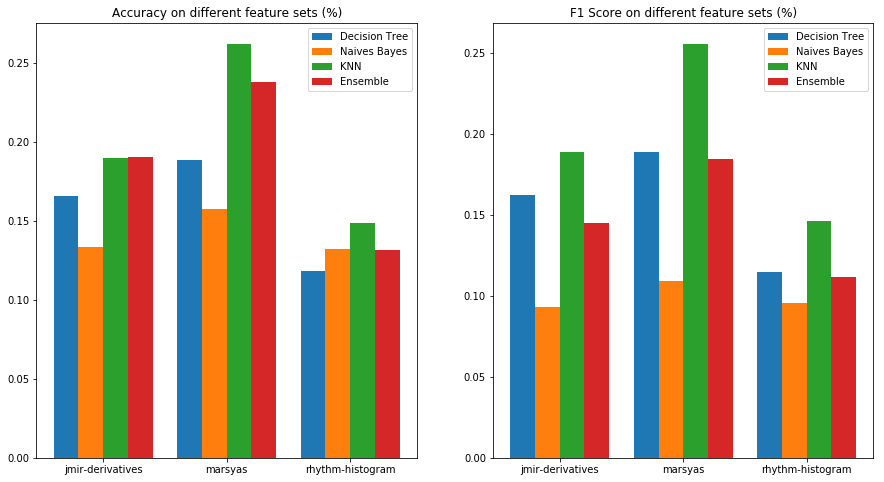

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax0, ax1 = axes.flatten()

x = np.array([1,2,3]).astype(np.float)

print([scores_tst_DT_DS1_precision, scores_tst_NB_DS1_precision, scores_tst_KNN_DS1_precision, scores_tst_ENSEMBLE_DS1_precision])
ax0.bar(x-0.3, [scores_tst_DT_DS1_precision, scores_tst_DT_DS2_precision, scores_tst_DT_DS3_precision], align='center', width=0.2)
ax0.bar(x-0.1, [scores_tst_NB_DS1_precision, scores_tst_NB_DS2_precision, scores_tst_NB_DS3_precision], align='center', width=0.2)
ax0.bar(x+0.1, [scores_tst_KNN_DS1_precision, scores_tst_KNN_DS2_precision, scores_tst_KNN_DS3_precision], align='center', width=0.2)
ax0.bar(x+0.3, [scores_tst_ENSEMBLE_DS1_precision, scores_tst_ENSEMBLE_DS2_precision, scores_tst_ENSEMBLE_DS3_precision], align='center', width=0.2)
ax0.legend(['Decision Tree','Naives Bayes','KNN', 'Ensemble'])
ax0.set_xticks([1, 2, 3])
ax0.set_xticklabels(['jmir-derivatives', 'marsyas', 'rhythm-histogram'])
ax0.set_title('Accuracy on different feature sets (%)')

ax1.bar(x-0.3, [scores_tst_DT_DS1_f1score, scores_tst_DT_DS2_f1score, scores_tst_DT_DS3_f1score], align='center', width=0.2)
ax1.bar(x-0.1, [scores_tst_NB_DS1_f1score, scores_tst_NB_DS2_f1score, scores_tst_NB_DS3_f1score], align='center', width=0.2)
ax1.bar(x+0.1, [scores_tst_KNN_DS1_f1score, scores_tst_KNN_DS2_f1score, scores_tst_KNN_DS3_f1score], align='center', width=0.2)
ax1.bar(x+0.3, [scores_tst_ENSEMBLE_DS1_f1score, scores_tst_ENSEMBLE_DS2_f1score, scores_tst_ENSEMBLE_DS3_f1score], align='center', width=0.2)
ax1.legend(['Decision Tree','Naives Bayes','KNN', 'Ensemble'])
ax1.set_xticks([1, 2, 3])
ax1.set_xticklabels(['jmir-derivatives', 'marsyas', 'rhythm-histogram'])
ax1.set_title('F1 Score on different feature sets (%)')

plt.show()


In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

csv_input = pd.read_csv("../input/msd-marsyas_test_new_nolabels/msd-marsyas_test_new_nolabels.csv", header=None)

dataset_to_predict = csv_input.iloc[:,2:126].values
dataset_to_predict = scaler.fit_transform(dataset_to_predict)

predicted_labels = model_ENSEMBLE_DS2.predict(dataset_to_predict)


/home/alexandre/miniconda3/envs/gti770/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [89]:
df = pd.DataFrame({ 'ID': csv_input.iloc[:,1], 'Label': predicted_labels})
    
df.to_csv('output.csv', index=False)

In [90]:
print(predicted_labels)

[ 9  6  9 ... 12  6 18]


**1. Avec les liens fournis en l’annexe de cet énoncé et avec vos trouvailles faites sur Internet par le biais de vos recherches personnelles, faites, à titre d’introduction, une revue de la littérature. Expliquez en quelques paragraphes comment nous réussissons aujourd’hui à classifier différents sons et pièces musicales automatiquement afin de bien comprendre le sujet sur lequel vous travaillez.**

De nos jours, il n’est plus nécessaire d’avoir des étiquettes ou même de l’information texte sur un enregistrement musical pour pouvoir le classifier. Il est possible d’extraire directement d’un fichier musical des caractéristiques qui permettent cette classification. Parmi ces caractéristiques, il y a l’analyse du rythme, les variations fréquentielles, la forme du spectrographe à un certain moment et bien d’autres. Les caractéristiques peuvent donc être extraites et mesurées pour chaque fichier musical. Ces mesures permettent ensuite de créer des représentations du fichier qui à leur tour permettront de les classifier.

À l’aide des mesures de caractéristiques, il est maintenant possible d’évaluer les préférences musicales d’un individu. Il suffit d’utiliser la musique qu’il écoute et ainsi estimer la musique qui pourrait lui plaire. Les récentes recherches démontrent aussi que l’extraction de caractéristiques faite par ordinateur possède un niveau de précision similaire à la même extraction faite par un humain. Cela permet donc de conclure que l’efficacité d’analyse d’un fichier musical par ordinateur a beaucoup évolué  et est maintenant une évaluation fiable de la musique.

Finalement, des logiciels et applications comme Spotify utilisent l’extraction de caractéristiques. Ils collectent les informations sur ce que l’utilisateur écoute actuellement et recommande ensuite de la musique qui possède des caractéristiques similaires. Bien sûr, ils utilisent d’abord les informations qu’ils ont déjà, mais utilisent les caractéristiques pour aider leurs recommandations. Cela prouve donc que l’extraction des caractéristiques de fichier musical est bel et bien utilisée aujourd’hui et fonctionne très bien.

**2. Quelle est la configuration (machine, matériel, versions logiciel) de votre environnement? Quelle a été votre approche de partitionnement des données? Quels ensembles de primitives avez-vous choisis? Quelle méthode de validation avez-vous utilisée afin de confectionner vos modèles? Quelles étapes supplémentaires avez-vous eu à effectuer en prétraitement (normalisation, balancement, réduction de dimensionnalité, etc.)?**

La configuration de l’environnement utilisée pour ce laboratoire est un PC avec Linux Ubuntu 18.04, processeur AMD Ryzen 5 1600 (6 coeurs, 12 threads), SSD Samsung 850 EVO, 16 GB RAM. Les versions des logiciels utilisées sont Python 3.6.5, jupyter 1.0.0, graphviz 2.40.1, numpy 1.14.5, pandas 0.23.1, matplotlib 2.2.2, scikit-learn 0.19.1.

Pour le partitionnement des données, l’équipe a choisi d’utiliser la méthode cross-validation. C’était une méthode simple à utiliser qui permettait de séparer les données en plusieurs groupes. Cette méthode permettait aussi de séparer les données de façon égale selon leurs étiquettes. Il y avait donc un entraînement équitable et, par la suite, des tests équitables.

Les ensembles de primitives utilisés dans ce laboratoire sont: JMIR Derivatives, MARSYAS et Rhythm Histogram.

La méthode de validation utilisée pour confectionner nos 3 modèles est le cross-validation. Pour chacun des modèles, les méthodes StratifiedShuffleSplit ainsi que StratifiedKFold sont utilisées. Ces méthodes de sklearn implémentent directement le cross-validation. Dépendamment du modèle et du temps requis pour effectuer la méthode, le nombre de splits est soit de 5 ou de 20.	

**3. Quels sont les trois modèles d’apprentissage que vous avez décidé d’étudier à titre de classificateur de base? Exprimez les raisons qui vous ont mené à un tel choix. Si vous avez décidé d’implémenter un réseau de neurones, décrivez la structure de votre modèle d’apprentissage par réseau de neurones. Ajoutez tous graphiques ou représentation pertinente afin de décrire votre modèle, par exemple, un graphe TensorBoard si applicable ou un texte descriptif.**

Les 3 modèles d’apprentissage utilisés sont l’arbre de décision, le modèle Bayes Naïf ainsi que K-Nearest-Neighbors. Nous avons choisi ces 3 modèles, car il était facile de modifier leurs hyperparamètres afin d’obtenir les meilleurs résultats possibles. C’est aussi 3 modèles très différents et donc ils peuvent créer une combinaison linéaire efficace. Le modèle qui avait été utilisé comme classificateur de base est l’arbre de décision, car après avoir effectué des tests de précision, c’est celui-ci qui avait les meilleurs résultats. Par contre, après avoir tester chaque modèle sur chacun des ensembles de données à la fin, KNN affichait un bien meilleur score. C’est donc ce modèle que l’équipe a utilisé comme classificateur de base.

**4. Pour vos trois modèles, présentez les hyperparamètres d’apprentissage et les ensembles de données utilisées ayant menés à votre meilleur résultat de précision (accuracy) et F-measure. Comment ces classificateurs ont-ils performés sur cet ensemble de données ? Discutez des résultats.**

Pour le modèle Arbre de décision, les hyperparamètres utilisés dans le laboratoire sont le critère gini avec un max-depth de 10. Ces hyperparamètres ont été trouvés en effectuant un <<tuning>>. Le code python a donc retourner les meilleurs hyperparamètres pour notre situation. Ce modèle a été utilisé sur l’ensemble de données “jmir-derivatives” et a retourné une précision de 0.17 avec un f1-score de 0.16.

Dans le modèle Bayes Naïf utilisé, l’hyperparamètre max-depth possède une valeur de 20. Cette valeur a été choisie, car c’est celle qui donnait la meilleure précision lors de nos tests avec des valeurs différentes. Ce modèle a été utilisé sur l’ensemble de données “marsyas” et a retourné une précision de 0.12 avec un f1-score de 0.09.

Le 3ème modèle utilisé est le KNN. Pour trouver les meilleurs hyperparamètres, le <<tuning>> a aussi été utilisé ici. La code a donc trouvé que la valeur optimale de k était de 10. Le modèle a été utilisé sur l’ensemble de données “rhythm-histogram” et a retourné une précision de 0.15 avec un f1-score de 0.15.


**5. Présentez la conception de votre solution finale au problème (votre solution reposant sur la théorie des ensembles). Présentez ici le diagramme nécessaire afin de présenter convenablement votre combinaison de modèles, les ensembles de primitives choisies ainsi que la stratégie de combinaison. Faites une discussion expliquant vos décisions de conception. Faites des liens avec l’implémentation et présentez le code clé de celle-ci.**

3 algorithmes ont été combinés pour créer l’ensemble. Ces 3 algorithmes sont Arbre de décision, KNN et Bayes. Ils sont été entraînés chacun avec des primitives différentes ainsi que des sous-ensembles différents. Il y a ensuite une combinaison linéaire de ces 3 modèles. Cette combinaison utilise la stratégie multi-experts, ce qui veut dire que chaque modèle calcule chaque entrée et indique la valeur de prédiction à la sortie. Il s’agit ensuite de vote pondéré pour déterminer la valeur acceptée de la sortie. Ce système de vote a été implémenté avec le VotingClassifier de la librairie sklearn. L’équipe a choisi d’utiliser une combinaison multi-experts, car c’était la combinaison linéaire la plus simple et la plus facile à tester. Il était donc facile de lui apporter des modifications.

Le VotingClassifier a servi à combiner les différents algorithmes pour créer un ensemble. Une entrée est donc traitée par les 3 algorithmes et, selon le vote, ceux-ci déterminent la valeur de la sortie. Il réduit donc le taux de mauvaise classification, puisqu’il réduit les chances de prendre la mauvais classificateur.

**6. Consignez dans un tableau les hyperparamètres finaux de vos modèles faisant partie de votre ensemble. Présentez le score de précision (accuracy) et F1 final de votre ensemble. Présentez une discussion faisant l’analyse des résultats de votre système final. Décrivez les problèmes et difficultés rencontrées. Décrivez les performances de votre ensemble et tentez d’expliquer ces résultats.**

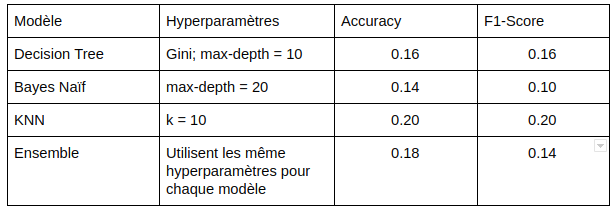

L’ensemble obtenu présente une précision de 0.18 ce qui est bon étant donné qu’il y a 25 étiquettes différentes. Cet ensemble présente cependant une précision moindre à celle du modèle KNN seul. Cela est dû au fait que les 2 autres modèles ont aussi leur poids lors de l’attribution d’une étiquette à une donnée de test. Il y a ainsi des erreurs qui peuvent s’ajouter lors de la combinaison de plusieurs modèles. Par contre, sur un autre ensemble de test, il est possible que l’ensemble affiche une meilleure précision.

Il a été difficile de configurer un graphique à l’aide de la librairie matplotlib qui représentait bien les données obtenues. Une autre difficulté rencontrée a été la limite de calcul de nos machines. À cause de ça, nous avons dû laisser de côté les algorithmes SVM ainsi que réseaux de neurones multi-couches. Ces algorithmes, bien que souvent ils affichent une précision très grande, étaient trop coûteux pour qu’on les utilise sur nos machines.

**7. Formulez quelques pistes d’amélioration de la solution développée.**

Il serait possible d’améliorer la solution en utilisant des modèles qui présentent une meilleure précision. Pour faire ça, il faudrait tester chaque modèle avec chaque ensemble de données disponible et trouver les meilleurs hyperparamètres dans chacun des cas. Il s’agirait ensuite de comparer la précision de chacun de ses modèles et combiner les 3 meilleurs. Cela dit, cette méthode donnerait un ensemble avec une très bonne précision, mais pas nécessairement celui avec la meilleure précision. Dans ce cas, il faudrait tester chaque combinaison de 3 avec tous les modèles obtenus.

Une autre façon d’améliorer la solution serait d’augmenter le nombre de données dans les ensembles de données. Cela permettrait aux modèles de s’entraîner sur davantage d’exemples et donc d’avoir une meilleure compréhension des critères, des valeurs de ceux-ci ainsi que les étiquettes qui s’associent avec celles-ci.

L’utilisation de Boosting aurait aussi pu être utilisé pour optimiser la performance du système. Dans ce laboratoire, il aurait été possible de l’appliquer et ainsi de réduire le temps de calcul du système.

Finalement, davantage de prétraitement des données au départ permettrait aux modèles de s’entraîner sur des données qui sont plus faciles à analyser. De cette façon, la séparation entre les différentes données seraient plus claires et donc la précision des différents modèles augmenteraient du même coup.

